Original Shape: (283993, 55)
Subsampled Shape: (60000, 55)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 60000 entries, 205688 to 191078
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Elevation                           60000 non-null  int64  
 1   Aspect                              60000 non-null  int64  
 2   Slope                               60000 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    60000 non-null  int64  
 4   Vertical_Distance_To_Hydrology      60000 non-null  int64  
 5   Horizontal_Distance_To_Roadways     60000 non-null  int64  
 6   Hillshade_9am                       60000 non-null  int64  
 7   Hillshade_Noon                      60000 non-null  int64  
 8   Hillshade_3pm                       60000 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  60000 non-null  int64  
 10  Wilderness_Area1               

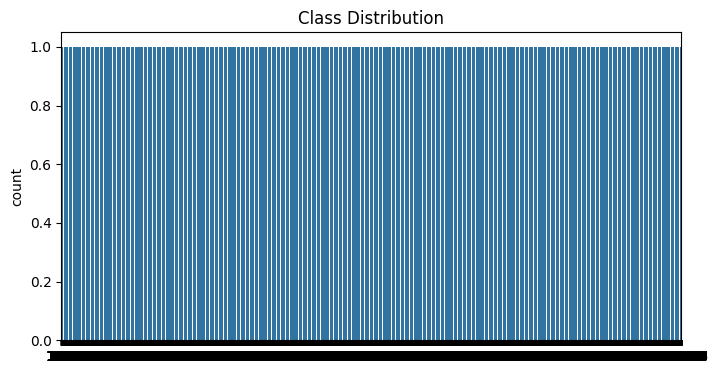

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

RANDOM_STATE = 42

df = pd.read_csv("/content/covtype.csv")
print("Original Shape:", df.shape)

df = df.sample(60000, random_state=RANDOM_STATE)
print("Subsampled Shape:", df.shape)


print("\nDataset Info:")
df.info()

plt.figure(figsize=(8,4))
sns.countplot(df['Cover_Type'])
plt.title("Class Distribution")
plt.show()


X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=RANDOM_STATE
)



In [ ]:
import sys
!{sys.executable} -m pip install --upgrade pip setuptools wheel
!{sys.executable} -m pip install scikit-learn pandas numpy matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 95.8 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
log_reg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(
        multi_class='multinomial',
        max_iter=300,
        random_state=RANDOM_STATE
    ))
])

log_reg_params = {
    'clf__C': [1, 10],
    'clf__solver': ['lbfgs']
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

log_reg_grid = GridSearchCV(
    log_reg_pipe, log_reg_params, scoring='f1_macro',
    cv=cv, n_jobs=-1
)

print("\nTraining Logistic Regression...")
log_reg_grid.fit(X_train, y_train)

y_pred_lr = log_reg_grid.predict(X_test)

print("\nLogistic Regression Results:")
print("Best Params:", log_reg_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Macro F1:", f1_score(y_test, y_pred_lr, average='macro'))
print(classification_report(y_test, y_pred_lr))



Training Logistic Regression...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression Results:
Best Params: {'clf__C': 10, 'clf__solver': 'lbfgs'}
Accuracy: 0.7696666666666667
Macro F1: 0.5756214715904239
              precision    recall  f1-score   support

         1.0       0.73      0.61      0.66      2517
         2.0       0.80      0.89      0.84      5288
         3.0       0.71      0.93      0.81       530
         4.0       0.69      0.43      0.53        83
         5.0       0.41      0.09      0.15       207
         6.0       0.57      0.23      0.33       239
         7.0       0.85      0.60      0.71       136

    accuracy                           0.77      9000
   macro avg       0.68      0.54      0.58      9000
weighted avg       0.76      0.77      0.75      9000



In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svm_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', LinearSVC(max_iter=5000))
])

svm_model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', LinearSVC(max_iter=5000))])

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("SVM Accuracy:", accuracy)


SVM Accuracy: 0.7646666666666667
